In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

# **Load the Dataset**

In [33]:
df = pd.read_csv('heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


# **Analysis of the Data**

In [34]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [36]:
for i in df.columns:
    print('{n}: '.format(n = i), df[i].nunique())

age:  48
anaemia:  2
creatinine_phosphokinase:  290
diabetes:  2
ejection_fraction:  17
high_blood_pressure:  2
platelets:  203
serum_creatinine:  43
serum_sodium:  27
sex:  2
smoking:  2
time:  155
DEATH_EVENT:  2


## **Plotting graph of the Variables**

<Axes: xlabel='smoking'>

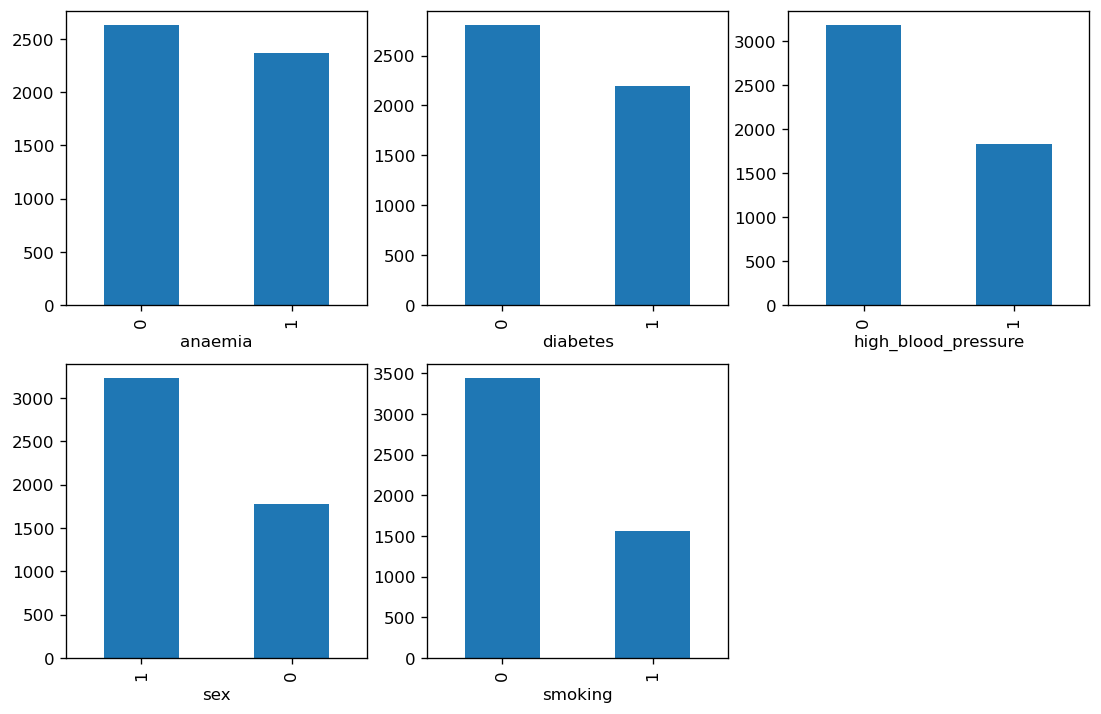

In [37]:
plt.figure(dpi = 120, figsize = (11, 7))
plt.subplot(231)
df['anaemia'].value_counts().plot(kind = 'bar')
plt.subplot(232)
df['diabetes'].value_counts().plot(kind = 'bar')
plt.subplot(233)
df['high_blood_pressure'].value_counts().plot(kind = 'bar')
plt.subplot(234)
df['sex'].value_counts().plot(kind = 'bar')
plt.subplot(235)
df['smoking'].value_counts().plot(kind = 'bar')

Text(0, 0.5, 'Death Event')

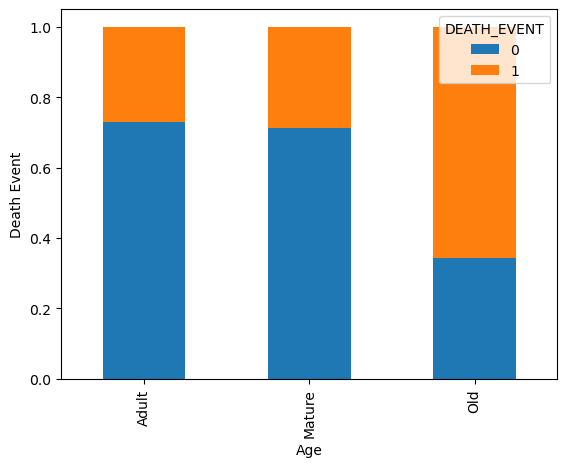

In [38]:
bins = [0, 25, 50, 75, 100]
group = ['Young', 'Adult', 'Mature', 'Old']
df['age_bin'] = pd.cut(df['age'], bins, labels = group)
age_bin = pd.crosstab(df['age_bin'], df['DEATH_EVENT'])
age_bin.div(age_bin.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Age')
plt.ylabel('Death Event')

You can see from the graph that more old people died due to heart failure than the adult and mature ones. Also no young people died due to heart faliure

<Figure size 1320x840 with 0 Axes>

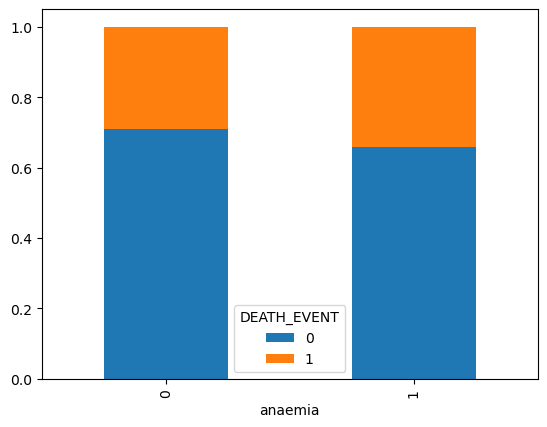

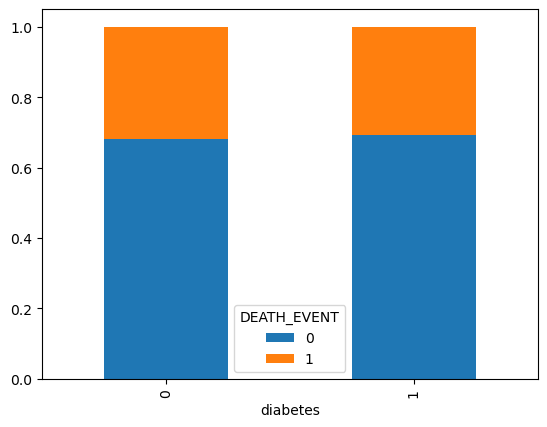

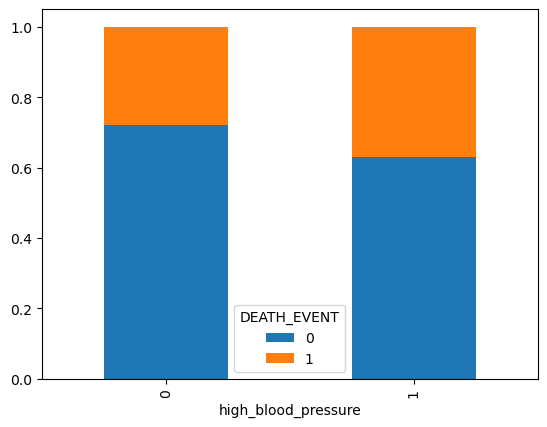

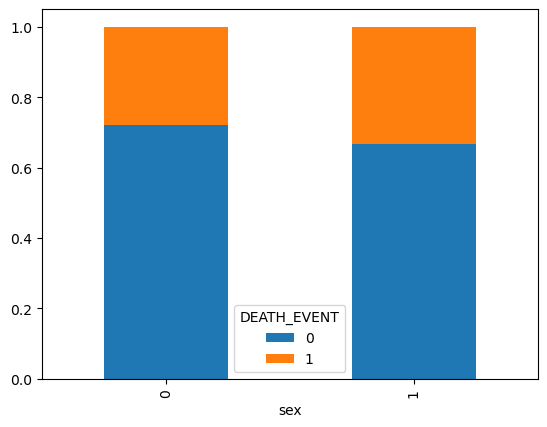

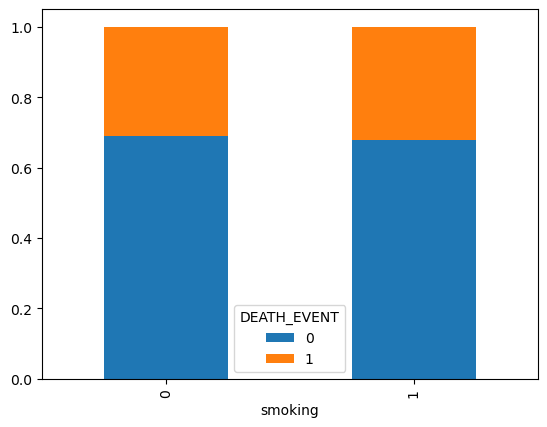

In [39]:
anaemia = pd.crosstab(df['anaemia'], df['DEATH_EVENT'])
diabetes = pd.crosstab(df['diabetes'], df['DEATH_EVENT'])
high_blood_pressure = pd.crosstab(df['high_blood_pressure'], df['DEATH_EVENT'])
sex = pd.crosstab(df['sex'], df['DEATH_EVENT'])
smoking = pd.crosstab(df['smoking'], df['DEATH_EVENT'])

plt.figure(dpi = 120, figsize = (11, 7))
anaemia.div(anaemia.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()
diabetes.div(diabetes.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()
high_blood_pressure.div(high_blood_pressure.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()
sex.div(sex.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()
smoking.div(smoking.sum(1).astype(int), axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

In [40]:
df = df.drop(columns = ['age_bin'])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [41]:
corr = df.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


<function matplotlib.pyplot.show(close=None, block=None)>

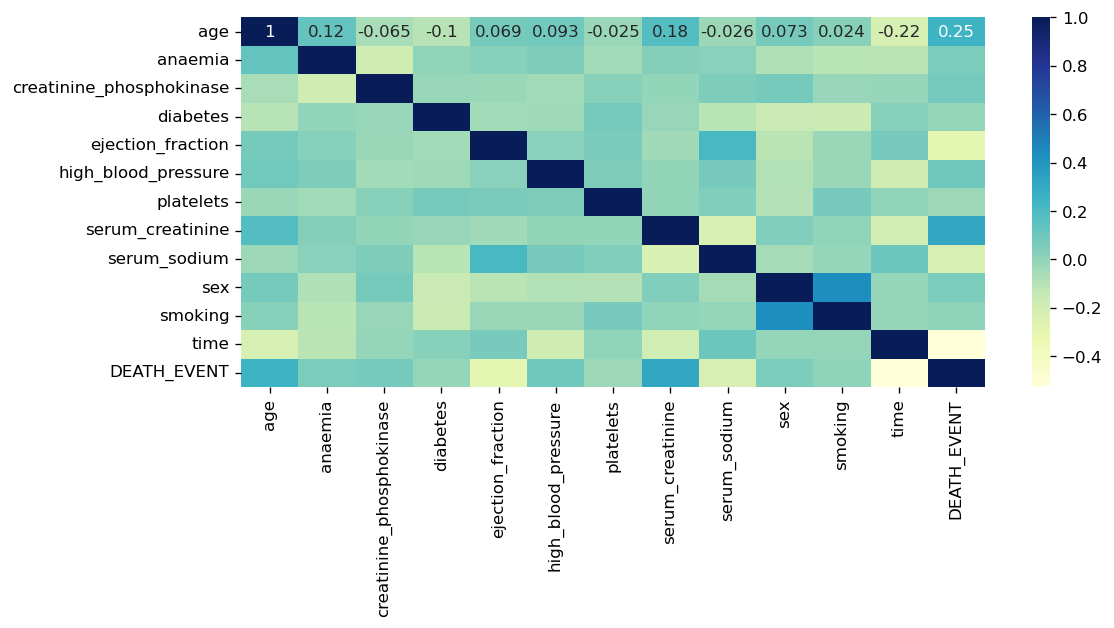

In [42]:
plt.figure(dpi = 120, figsize = (10, 4))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show

# **Data Spliting and Feature Scaling**

## **Using MinMaxScaler to Scale the data**

In [43]:
scaler_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in scaler_cols:
    df[i] = scaler.fit_transform(pd.DataFrame(df[i]))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.272727,0,0.092498,0,0.469697,0,0.288833,0.089888,0.685714,1,1,0.298932,0
1,0.454545,0,0.004210,0,0.166667,0,0.339314,0.505618,0.485714,1,0,0.722420,0
2,0.090909,0,0.071319,1,0.363636,0,0.356286,0.044944,0.771429,0,0,0.854093,0
3,0.363636,1,0.093264,1,0.393939,1,0.367196,0.078652,0.371429,1,0,0.306050,0
4,1.000000,1,0.071319,0,0.242424,0,0.528428,0.168539,0.542857,1,0,0.163701,1


## **Spliting the data into x and y**

In [44]:
X = df.drop(columns = ['DEATH_EVENT'])
Y = df['DEATH_EVENT']

## **Creating Train and Test set for the data**

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

# **Model Building**

## **Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

### **Predicting from the train set to check**

In [47]:
from sklearn.metrics import accuracy_score, classification_report
train_prediction = DTC.predict(x_train)
accuracy = accuracy_score(y_train, train_prediction)
print('Accuracy: ', accuracy)
print(classification_report(y_train, train_prediction))

Accuracy:  0.99975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2737
           1       1.00      1.00      1.00      1263

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



### **Predicting from the test set**

In [48]:
test_prediction = DTC.predict(x_test)
accuracy = accuracy_score(y_test, test_prediction)
print('Accuracy: ', accuracy)
print(classification_report(y_test, test_prediction))

Accuracy:  0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       695
           1       1.00      0.97      0.98       305

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.99      1000
weighted avg       0.99      0.99      0.99      1000



## **Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(x_train, y_train)

LogisticRegression()

### **Predicting from the train set to check**

In [50]:
train_prediction1 = logR.predict(x_train)
accuracy1 = accuracy_score(y_train, train_prediction1)
print('Accuracy: ', accuracy1)
print(classification_report(y_train, train_prediction1))

Accuracy:  0.85475
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2737
           1       0.80      0.72      0.76      1263

    accuracy                           0.85      4000
   macro avg       0.84      0.82      0.83      4000
weighted avg       0.85      0.85      0.85      4000



### **Predicting from the test set**

In [51]:
test_prediction1 = logR.predict(x_test)
accuracy1 = accuracy_score(y_test, test_prediction1)
print('Accuracy: ', accuracy1)
print(classification_report(y_test, test_prediction1))

Accuracy:  0.852
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       695
           1       0.78      0.71      0.75       305

    accuracy                           0.85      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.85      0.85      0.85      1000



# **Model Accuracy**

In [52]:
d = {'Model': 'Decision Tree',
    'Accuracy': accuracy}
model_accuarcy = pd.DataFrame(d, index = [0])
model_accuarcy

,Model,Accuracy
0,Decision Tree,0.99


In [53]:
d = {'Model': 'Logistic Regression',
    'Accuracy': accuracy1}
model_accuarcy1 = pd.DataFrame(d, index = [1])
model_accuarcy = pd.concat([model_accuarcy, model_accuarcy1], axis = 0)
model_accuarcy

,Model,Accuracy
0,Decision Tree,0.990
1,Logistic Regression,0.852
